In [25]:

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import numpy as np
#import pandas_profiling
import seaborn as sns


In [26]:
crime_df = pd.read_csv("COBRA-2009-2018.csv")
crime_df.head(100)

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,1/1/2009,1/1/2009,1145,1/1/2009,1148.0,408.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,1/1/2009,1/1/2009,1330,1/1/2009,1330.0,506.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,1/1/2009,1/1/2009,1500,1/1/2009,1520.0,413.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,1/1/2009,1/1/2009,1450,1/1/2009,1510.0,204.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,1/1/2009,1/1/2009,1600,1/1/2009,1700.0,408.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773
5,90011327,1/1/2009,1/1/2009,1645,1/1/2009,1645.0,607.0,NaN,NaN,1217 CAROLINE ST NE,Evening Watch,24,LARCENY-NON VEHICLE,630,2303,Edgewood,O,33.75786,-84.34875
6,90011450,1/1/2009,1/1/2009,1740,1/1/2009,1815.0,308.0,NaN,NaN,2685 METROPOLITAN PARKWAY,Evening Watch,12,LARCENY-NON VEHICLE,630,2303,Venetian Hills,S,33.70827,-84.45385
7,90011608,1/1/2009,1/1/2009,1627,1/1/2009,2110.0,204.0,NaN,NaN,3393 PEACHTREE RD,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
8,90010721,1/1/2009,1/1/2009,815,1/1/2009,820.0,408.0,NaN,NaN,3030 HEADLAND DR SW,Day Watch,12,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68841,-84.48742
9,90010108,1/1/2009,12/31/2008,2000,1/1/2009,100.0,506.0,NaN,NaN,360 MARIETTA ST NW,Morning Watch,18,LARCENY-FROM VEHICLE,640,2305,Downtown,M,33.76269,-84.39702


In [27]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317904 entries, 0 to 317903
Data columns (total 19 columns):
Report Number              317904 non-null int64
Report Date                317904 non-null object
Occur Date                 317904 non-null object
Occur Time                 317904 non-null int64
Possible Date              317886 non-null object
Possible Time              317885 non-null float64
Beat                       317694 non-null float64
Apartment Office Prefix    9570 non-null object
Apartment Number           64077 non-null object
Location                   317902 non-null object
Shift Occurence            317904 non-null object
Location Type              310373 non-null object
UCR Literal                317904 non-null object
UCR #                      317904 non-null int64
IBR Code                   317748 non-null object
Neighborhood               306464 non-null object
NPU                        317780 non-null object
Latitude                   317904 non-null 

In [28]:
#crime_df.shape

In [41]:

crime_df["Occur Date"] = pd.to_datetime(crime_df["Occur Date"], format='%m/%d/%Y')
temp = crime_df["Occur Date"]
temp.head()

0   2009-01-01
1   2009-01-01
2   2009-01-01
3   2009-01-01
4   2009-01-01
Name: Occur Date, dtype: datetime64[ns]

In [35]:

New_date = pd.DataFrame()
New_date["Year_s"] = crime_df["Occur Date"].astype(str).apply(lambda x: x[0:4])
New_date["Month_s"] = crime_df["Occur Date"].astype(str).apply(lambda x: x[5:7])
New_date.head()

,Year_s,Month_s
0,2009,01
1,2009,01
2,2009,01
3,2009,01
4,2009,01


In [38]:
df_res = crime_df[crime_df['UCR Literal'] == 'BURGLARY-RESIDENCE']
df_nonres = crime_df[crime_df['UCR Literal'] == 'BURGLARY-NONRES']


C:\Users\JC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


KeyError: 'New_date'

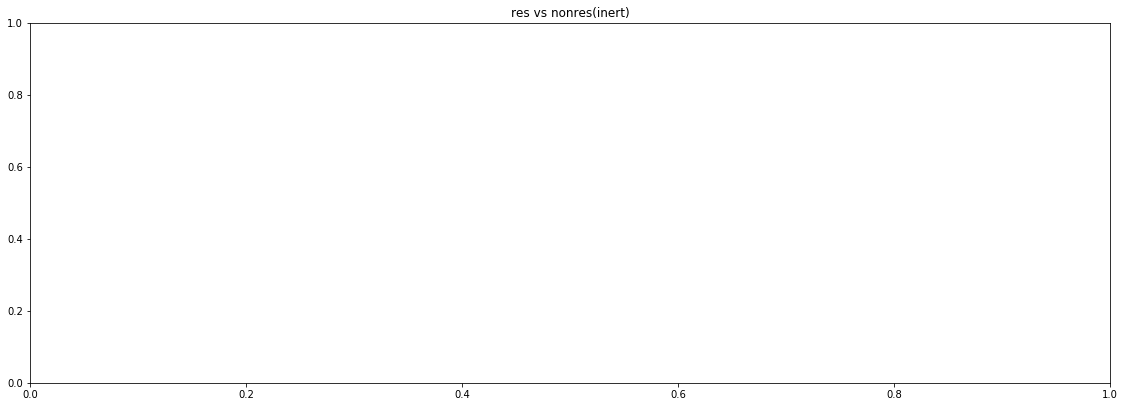

In [43]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0, 0, 1, 1])

ax1.set_title('res vs nonres(inert)')

ax1.plot(crime_df['New_date'],
         crime_df['df_nonres'],
         color='green')

ax2.plot(crime_df['New_date'],
         crime_df['df_res'],
         color='blue')
plt.show()


ValueError: Could not interpret input 'temp'

In [23]:


#temp = crime_df["Occur Date"]
#df_res = crime_df["UCR Literal"]

#date_format = mpl_dates.DateFormatter('%b, %d, %Y')
#plt.plot_date(Date, Date2, fmt=date_format, linestyle='solid')

#plt.gcf().autofmt_xdate()

#plt.gca().xaxis.set_major_formatter(date_format)

#plt.title('Crime By Date')
#plt.xlabel('Date')
#plt.ylabel('Number Of Crimes')
#plt.show()


ConversionError: Failed to convert value(s) to axis units: array([<matplotlib.dates.DateFormatter object at 0x00000240DDB55EB8>],
      dtype=object)

Error in callback <function flush_figures at 0x00000240CA25BD90> (for post_execute):


KeyboardInterrupt: 

In [11]:
#sns.baplot(x='Occur_Date' y=)

#Date = crime_df['Occur_Date']
#Date2 = drime_df["Possible_Date"]

#plt.plot_date(Date, Date2, linestyle='solid')

KeyError: 'Occur_Date'

In [ ]:
#plt.plot_date(Date, Date2, linestyle='solid')

#plt.gcf().autofmt_xdate()

#date_format = mpl_dates.DateFormatter('%b, %d, %Y')

#plt.gca().xaxis.set_major_formatter(date_format)

#plt.title('Crime By Date')
#plt.xlabel('Date')
#plt.ylabel('Number Of Crimes')

In [ ]:
#plt.plot_dates(dates, y, linestyle='solid')

#plt.gcf().autofmt_xdate()